<a href="https://colab.research.google.com/github/GavenDcosta/ML_codes/blob/main/diabetes_Boosting_Classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

# Load the dataset
data = pd.read_csv('/content/diabetes.csv')

# Display information about the dataset
print(data.info())
print(data.head())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


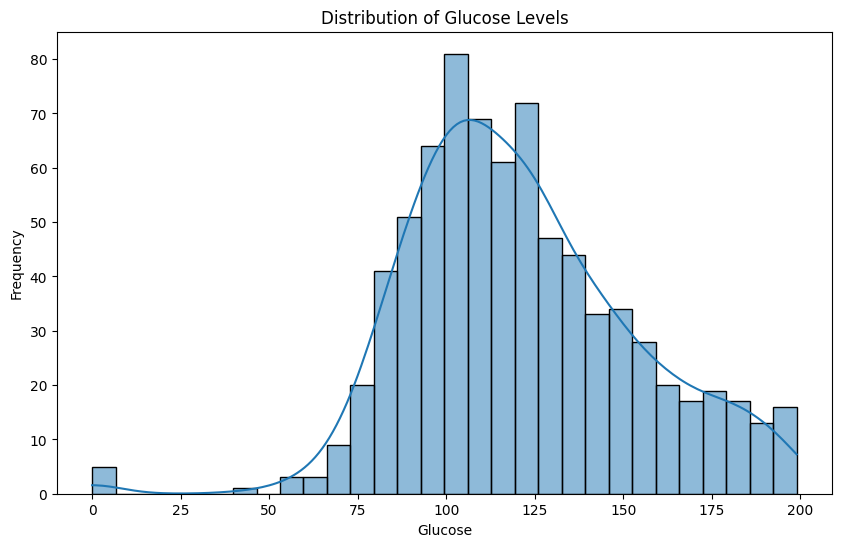

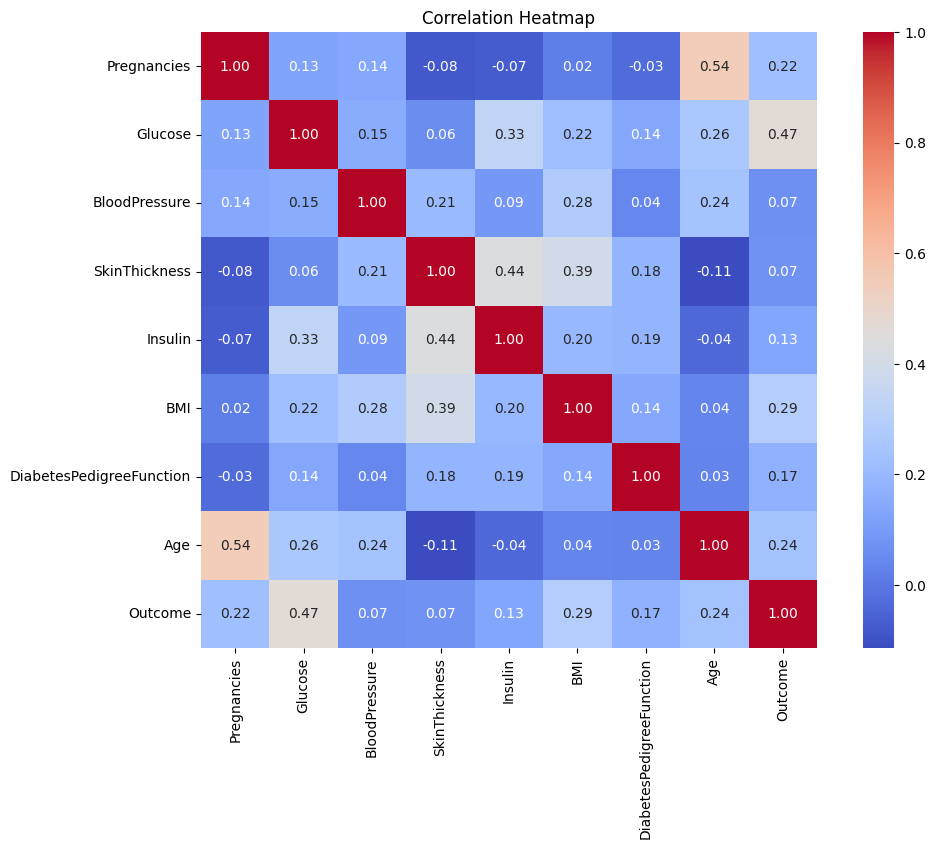

In [4]:
# Checking for missing values
print(data.isnull().sum())

# Visualizing the distribution of 'Glucose' feature
plt.figure(figsize=(10, 6))
sns.histplot(data['Glucose'], bins=30, kde=True)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

# Heatmap to visualize correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


In [5]:
# Split the dataset into features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Create and train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

# Make predictions
logistic_predictions = logistic_model.predict(X_test)

# Evaluate the model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_cm = confusion_matrix(y_test, logistic_predictions)
print(f'Logistic Regression Accuracy: {logistic_accuracy:.2f}')
print('Confusion Matrix:\n', logistic_cm)
print(classification_report(y_test, logistic_predictions))


Logistic Regression Accuracy: 0.75
Confusion Matrix:
 [[78 21]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [7]:
# Create and train an XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_cm = confusion_matrix(y_test, xgb_predictions)
print(f'XGBoost Accuracy: {xgb_accuracy:.2f}')
print('Confusion Matrix:\n', xgb_cm)
print(classification_report(y_test, xgb_predictions))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:19:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.71
Confusion Matrix:
 [[73 26]
 [19 36]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



<ipython-input-8-8f9339b86d8f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=accuracies, x='Model', y='Accuracy', palette='viridis')


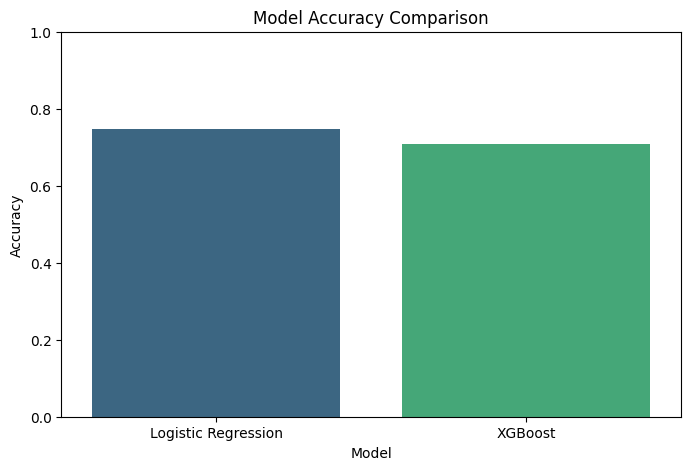

In [8]:
# Compare accuracies
accuracies = pd.DataFrame({
    'Model': ['Logistic Regression', 'XGBoost'],
    'Accuracy': [logistic_accuracy, xgb_accuracy]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=accuracies, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()


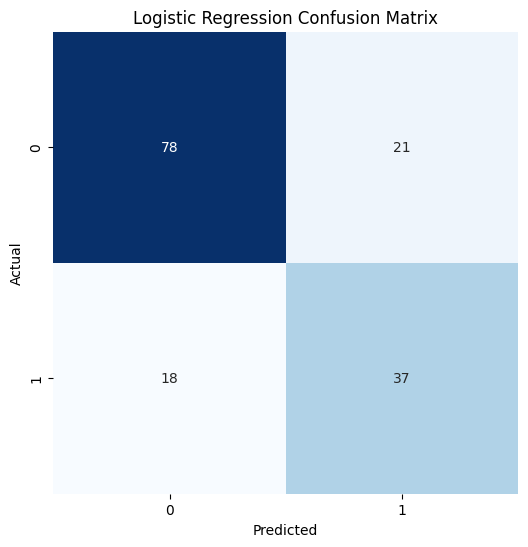

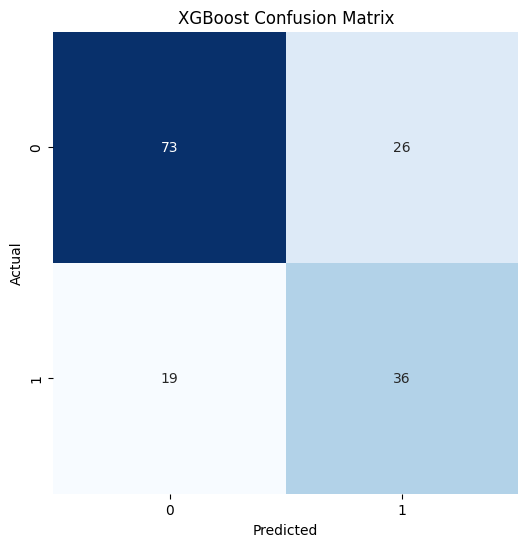

In [9]:
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 6))
sns.heatmap(logistic_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for XGBoost
plt.figure(figsize=(6, 6))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
